In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))


In [32]:
from sklearn.model_selection import train_test_split 


In [3]:
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)


In [4]:
from df_overview import DfOverview
from df_outlier import DfOutlier
from file_handler import FileHandler
import vis_seaborn as vs
from eda_helper import Helper
from df_cleaner import *

In [5]:
helper = Helper()
file_handler = FileHandler()

In [6]:
df = file_handler.read_csv("../data/cleaned_data.csv")
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.23,0.28,0.15,0.24,0.08,0.85,0.91,5.98,86.20,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,1937.05,0.16,0.63,0.71,0.27,0.42,0.12
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1937.05,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,86.20,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.10,0.13,0.23,0.24,0.11,0.25,0.08,0.50,1.16,3.44,27.23,0.01,0.06,0.06,0.02,0.04,0.01,14.91,26.50,98.87,567.70,0.19,0.63,0.69,0.26,0.42,0.12
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,86.20,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


In [7]:
df_overview = DfOverview(df)
df_overview.getOverview()

,count,none_count,none_percentage,unique_value_count,unique_percentage,dtype
label,,,,,,
id,569,0,0.0%,569,100.0%,int64
concave points_worst,569,0,0.0%,492,86.47%,float64
concavity_worst,569,0,0.0%,528,92.79%,float64
compactness_worst,569,0,0.0%,514,90.33%,float64
smoothness_worst,569,0,0.0%,406,71.35%,float64
area_worst,569,0,0.0%,510,89.63%,float64
perimeter_worst,569,0,0.0%,500,87.87%,float64
texture_worst,569,0,0.0%,507,89.1%,float64
radius_worst,569,0,0.0%,441,77.5%,float64


In [8]:
x = df.drop(['id', 'diagnosis'], axis=1)
normalized_x = helper.custome_normalizer(x)


In [9]:
y = df.diagnosis # M or B
y = y.map(lambda x: 1 if x == "M" else  0)
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.2, random_state=0)

In [11]:
from logesticRegressionModel import LogesticRegressionModel

In [12]:
log_model = LogesticRegressionModel(X_train, X_test, y_train, y_test)
clf, log_acc_arr, log_loss_arr = log_model.train(folds = 2)


step 0: Validation Accuracy of LogesticRegression is: 0.978
step 0: Validation Loss of LogesticRegression is: 0.148

step 1: Validation Accuracy of LogesticRegression is: 0.982
step 1: Validation Loss of LogesticRegression is: 0.133



step 1: Test Accuracy of LogesticRegression is: 0.965
Test Metrics
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



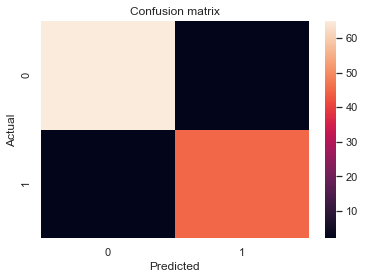

In [13]:
test_acc, test_loss, test_report, test_matrix = log_model.test()

In [14]:
fdf = log_model.feat_importance()

In [22]:
def plot_importance(random_feat_imp):
    fig = plt.figure(figsize=(12, 12))
    sns.barplot(data=random_feat_imp, x="importance", y="features")
    plt.title("Feature importance", size=18)
    plt.xticks(rotation=60, fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('features', fontsize=16)
    plt.ylabel("features importance", fontsize=16)
    plt.show()

    return fig

In [26]:
def get_top_features(fdf, top=10, importance_col_name="importance", feature_col_name="features"):
    fdf = fdf.sort_values(by=importance_col_name, ascending=False)
    return fdf.head(top)[feature_col_name].to_list()

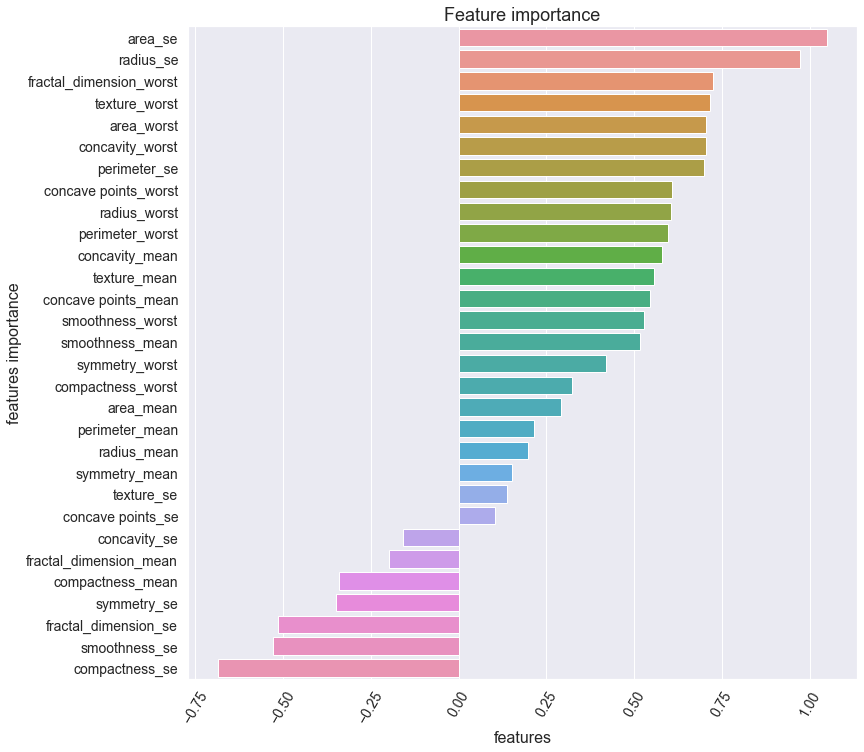

In [23]:
import matplotlib.pyplot as plt

fig = plot_importance(fdf)

step 0: Validation Accuracy of DecisionTreesModel is: 0.943
step 0: Validation Loss of DecisionTreesModel is: 0.239

step 1: Validation Accuracy of DecisionTreesModel is: 0.907
step 1: Validation Loss of DecisionTreesModel is: 0.304



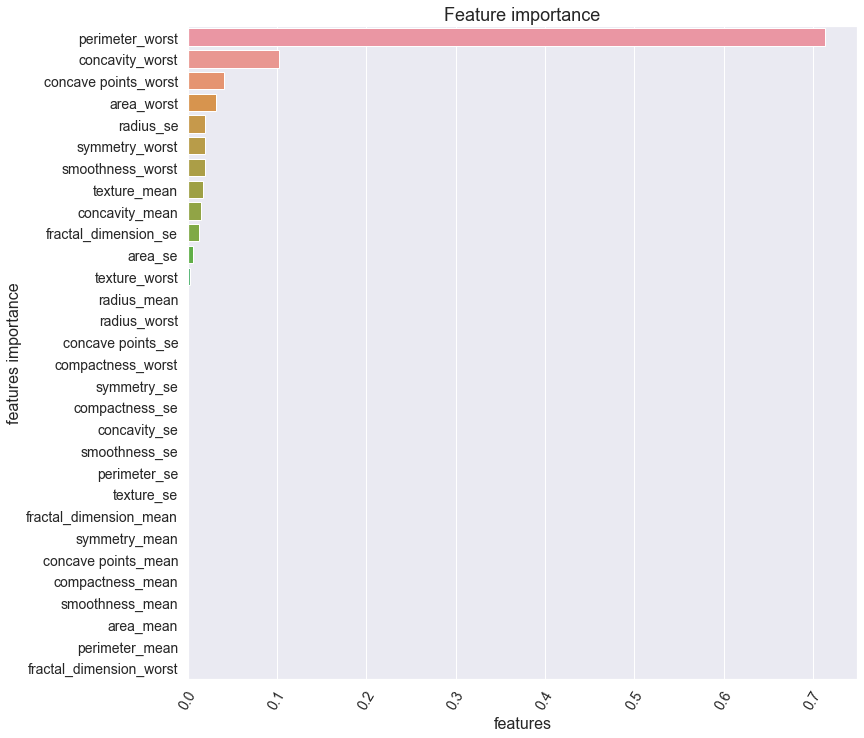

In [28]:
from decisionTreesModel import DecisionTreesModel
dec_model = DecisionTreesModel(X_train, X_test, y_train, y_test)
clf2, dec_acc_arr, dec_loss_arr = dec_model.train(folds = 2)
fd2 = dec_model.get_feature_importance()
fig = plot_importance(fd2)

In [29]:
get_top_features(fd2, 9)

['perimeter_worst',
 'concavity_worst',
 'concave points_worst',
 'area_worst',
 'radius_se',
 'symmetry_worst',
 'smoothness_worst',
 'texture_mean',
 'concavity_mean']

step 0: Validation Accuracy of GradientBoostingClassifier is: 0.943
step 0: Validation Loss of GradientBoostingClassifier is: 0.239

step 1: Validation Accuracy of GradientBoostingClassifier is: 0.947
step 1: Validation Loss of GradientBoostingClassifier is: 0.230



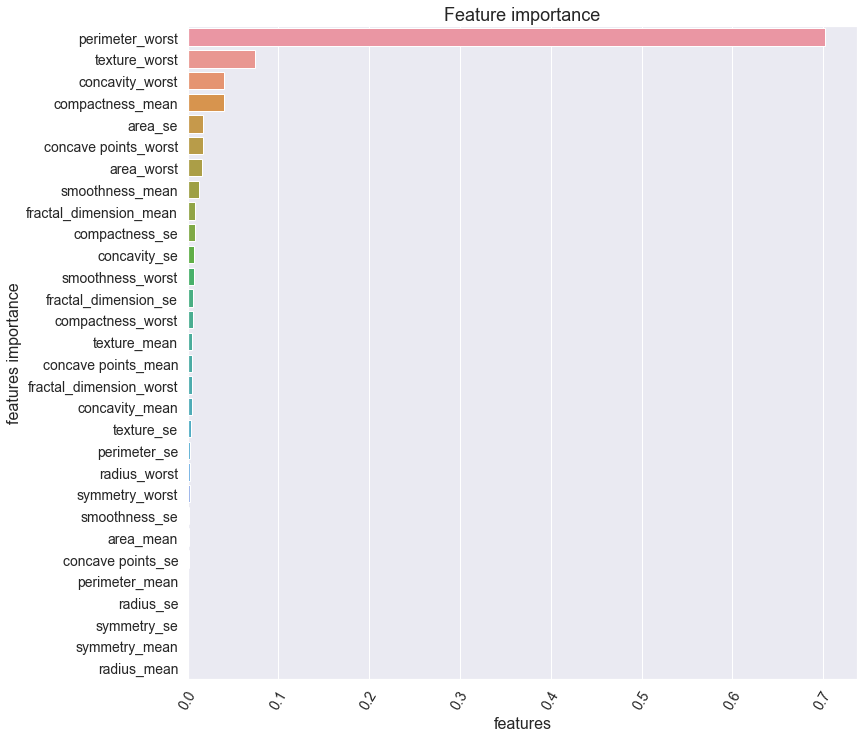

In [25]:
from xGBClassifierModel import XGBClassifierModel
boost_model = XGBClassifierModel(X_train, X_test, y_train, y_test)
clf3, boost_acc_arr, boost_loss_arr = boost_model.train(folds = 2)
fd3 = boost_model.get_feature_importance()
fig = plot_importance(fd3)

In [30]:
get_top_features(fd3, 9)

['perimeter_worst',
 'texture_worst',
 'concavity_worst',
 'compactness_mean',
 'area_se',
 'concave points_worst',
 'area_worst',
 'smoothness_mean',
 'fractal_dimension_mean']